#Trabalho 01 - K-Nearest Neighbors (K-NN)

O algoritmo k-Nearest Neighbors (k-NN) é um método de aprendizado de máquina supervisionado, não paramétrico e baseado em instâncias, utilizado principalmente para tarefas de classificação e regressão. Seu princípio fundamental é a ideia de que pontos de dados semelhantes tendem a pertencer à mesma classe ou ter valores semelhantes.

In [1]:
import math

### Calculo da distancia Euclidiana


O k-NN utiliza uma métrica de distância (comumente a distância Euclidiana) para medir a similaridade entre os pontos de dados. Para um novo ponto de dados (instância de teste), o algoritmo identifica os k pontos mais próximos (vizinhos) no conjunto de treinamento.


**Formula:**
`d(A,B) = sqrt( (x1 - y1)^2 + (x2 - y2)^2 + ... + (xn - yn)^2 )`

**Parametros:**

*   **ponto1:** lista ou tupla com as coordenadas do primeiro ponto
*   **ponto2:** lista ou tupla com as coordenadas do segundo ponto

Retorno:
valor da distancia (float)

In [2]:
def distancia_euclidiana(ponto1, ponto2):
  soma = 0
  for i in range(len(ponto1)):
    soma += (ponto1[i] - ponto2[i]) ** 2
  return math.sqrt(soma)

## Classificacao utilizando o algoritmo KNN



Em classificação, a classe do novo ponto é determinada pela votação majoritária entre os k vizinhos. Ou seja, a classe mais frequente entre os vizinhos é atribuída ao ponto de teste.

**Parametros:**
- **dados_treinamento:** lista de tuplas (caracteristicas, classe)
    
    Exemplo: [([1.0, 2.0], "Vermelho"), ([2.0, 3.0], "Verde")]

- **novo_ponto:** lista com os atributos do ponto a ser classificado
        
    Exemplo: [1.5, 2.5]

- **k:** numero de vizinhos mais proximos a considerar

**Retorno:**
  
  classe atribuida ao novo ponto

In [3]:
def knn_classificacao(pontos_treinamento, rotulos_treinamento, novo_ponto, k):
  distancias = []

  # Calcula a distância entre o novo ponto e todos os pontos de treinamento
  for i in range(len(pontos_treinamento)):
    distancia = distancia_euclidiana(novo_ponto, pontos_treinamento[i])
    distancias.append((distancia, rotulos_treinamento[i]))

    distancias.sort()# Ordena a lista de distâncias em ordem crescente
    vizinhos = distancias[:k] #Seleciona os k vizinhos mais próximos

    # Conta a frequência de cada rótulo entre os vizinhos
    contagem_rotulos = {}
    for distancia, rotulo in vizinhos:
      if rotulo in contagem_rotulos:
        contagem_rotulos[rotulo] += 1
      else:
        contagem_rotulos[rotulo] = 1

    # Retorna o rótulo mais frequente
    rotulo_mais_comum = max(contagem_rotulos, key=contagem_rotulos.get)
    return rotulo_mais_comum

# Pontos de treinamento
pontos = [
    [1, 2],
    [2, 3],
    [3, 3],
    [6, 5],
    [7, 7],
    [8, 6]
]

# Rótulos correspondentes aos pontos
rotulos = [
    "verde",
    "verde",
    "verde",
    "vermelho",
    "vermelho",
    "vermelho"
]

# Novo ponto a ser classificado
novo = [4, 4]

# Número de vizinhos a considerar
k = 3

resultado = knn_classificacao(pontos, rotulos, novo, k)
print("O novo ponto foi classificado como:", resultado)

O novo ponto foi classificado como: verde


## Regressao utilizando o algoritmo KNN



Para regressão, o valor predito é a média (ou mediana) dos valores dos k vizinhos.

**Parametros:**
- **dados_treinamento:** lista de tuplas (caracteristicas, valor)
Exemplo: [([1.0, 2.0], 5.0), ([2.0, 3.0], 6.5)]
- **novo_ponto:** lista com os atributos do ponto a ser previsto
Exemplo: [1.5, 2.5]
- **k:** numero de vizinhos mais proximos a considerar

**Retorno:**

valor previsto (float)

In [4]:
def knn_regressao(dados_treinamento, novo_ponto, k):

    # Calcular distancia entre o novo ponto e todos os pontos de treinamento
    distancias = []
    for caracteristicas, valor in dados_treinamento:
        distancia = distancia_euclidiana(caracteristicas, novo_ponto)
        distancias.append((distancia, valor))

    # Ordenar pela menor distancia e selecionar os k vizinhos
    vizinhos = sorted(distancias, key=lambda x: x[0])[:k]

    # Calcular a media dos valores dos vizinhos
    valores = [valor for _, valor in vizinhos]
    media = sum(valores) / len(valores)

    return media

# Conjunto de treinamento ficticio para regressao
dados_regressao = [
    ([1, 2], 5.0),
    ([2, 3], 6.0),
    ([3, 3], 7.5),
    ([6, 5], 10.0),
    ([7, 7], 11.5),
    ([8, 6], 13.0),
]

# Ponto a ser previsto
novo_ponto_reg = [4, 4]
# Número de vizinhos a considerar
k = 3

# Prever o valor do novo ponto
valor_previsto = knn_regressao(dados_regressao, novo_ponto_reg, k)
print(f"O valor previsto para o ponto {novo_ponto_reg} é {valor_previsto:.2f}.")

O valor previsto para o ponto [4, 4] é 7.83.


# Implementação com Dataset


### Importação de bibliotecas e funções

- **numpy as np:** biblioteca usada para cálculos numéricos eficientes, especialmente com arrays multidimensionais. É amplamente utilizada para manipulação de dados numéricos em machine learning.
- **pandas as pd:** biblioteca que fornece estruturas de dados como DataFrames, ideais para manipulação e análise de dados tabulares.
- **matplotlib.pyplot as plt:** importa o módulo pyplot da biblioteca Matplotlib, usado para criar visualizações gráficas, como gráficos de dispersão, linhas, histogramas, etc.

- **StandardScaler:** Importa a classe do scikit-learn para padronizar os dados (escalonamento). O KNN é sensível à escala das variáveis, então essa etapa transforma os dados para que tenham média zero e desvio padrão igual a um, garantindo que todas as variáveis contribuam igualmente para o cálculo das distâncias.

- **accuracy_score:** Calcula a acurácia do modelo, ou seja, a proporção de previsões corretas.

In [5]:
import pandas as pd
import numpy as np

In [6]:
#importa os datasets prontos da biblioteca sklearn
from sklearn.datasets import load_iris, load_wine

In [7]:
#função que separa dados de treinamento e teste
from sklearn.model_selection import train_test_split

In [8]:
# Padronização (importante para KNN, pois é sensível à escala dos dados)
from sklearn.preprocessing import StandardScaler

In [9]:
#algoritmo KNN
from sklearn.neighbors import KNeighborsClassifier

In [10]:
# Métricas de avaliação (acurácia, precisão, recall, f1-score)
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [11]:
import matplotlib.pyplot as plt

## Iris Dataset

O dataset contém 150 amostras de flores, distribuídas igualmente entre 3 classes (Iris Setosa, Iris Versicolor e Iris Virginica), com 4 características em cada amostra:

- Comprimento da sépala
- Largura da sépala
- Comprimento da pétala
- Largura da pétala

Essas variáveis são medidas em centímetros.


### Configuração Dataset Iris

In [12]:
iris = load_iris()

In [13]:
X_iris = iris.data  # Características: comprimento e largura da sépala e da pétala
y_iris = iris.target  # Classes: 0 - Iris Setosa, 1 - Iris Versicolor, 2 - Iris Virginica

###Visualizar classes do dataset Iris

In [14]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


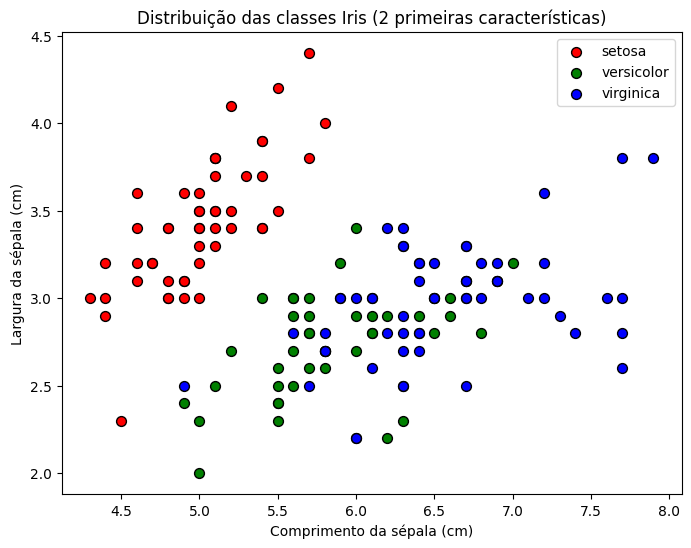

In [15]:
# Escolher as duas primeiras características (sepala comprimento e largura)
X_iris_plot = X_iris[:, :2]

plt.figure(figsize=(8,6))
colors = ['red', 'green', 'blue']

for i, color, target_name in zip(range(len(iris.target_names)), colors, iris.target_names):
    plt.scatter(X_iris_plot[y_iris == i, 0], X_iris_plot[y_iris == i, 1],
                color=color, label=target_name, edgecolor='k', s=50)

plt.xlabel('Comprimento da sépala (cm)')
plt.ylabel('Largura da sépala (cm)')
plt.title('Distribuição das classes Iris (2 primeiras características)')
plt.legend()
plt.show()

### Divisão dos dados em treino e teste

In [16]:
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42)

In [17]:
# Normalizar os dados (para garantir que as distâncias não sejam distorcidas)
scaler_iris = StandardScaler()
X_train_scaled_iris = scaler_iris.fit_transform(X_train_iris)
X_test_scaled_iris = scaler_iris.transform(X_test_iris)

In [18]:
# Criar e treinar o modelo K-NN
k_iris = 3  # Valor de K
knn_iris = KNeighborsClassifier(n_neighbors=k)
knn_iris.fit(X_train_scaled_iris, y_train_iris)

KNeighborsClassifier(n_neighbors=3)

###Calculo acurácia

In [19]:
# Fazer previsões no conjunto de teste
y_iris_pred = knn_iris.predict(X_test_scaled_iris)

In [20]:
# Avaliar a acuracia do modelo
acuracia_iris = accuracy_score(y_test_iris, y_iris_pred)
print(f"Acurácia (Iris, k=3): {acuracia_iris*100:.2f}%")

Acurácia (Iris, k=3): 100.00%


### Calcular Precisão e Recall

As métricas de precisão, recall e F1-score são fundamentais para avaliar o desempenho de um modelo de classificação, especialmente quando temos classes desbalanceadas ou quando o custo de erros varia entre classes.

**Definição das Métricas:**
- **Precisão:** Mede a capacidade do modelo de não classificar erroneamente uma instância como positiva (classe de interesse). Em outras palavras, de todas as previsões feitas como uma classe específica, quantas estavam realmente corretas.
- **Recall (ou Sensibilidade):** Mede a capacidade do modelo de identificar corretamente todas as instâncias positivas dessa classe. Em outras palavras, de todos os exemplos realmente pertencentes à classe, quantos o modelo conseguiu identificar corretamente.
- **F1-score:** A média harmônica entre precisão e recall. Essa métrica é útil quando precisamos de um equilíbrio entre precisão e recall. Quanto mais próximo de 1, melhor o desempenho do modelo.

Essas métricas podem ser calculadas para cada classe individualmente em um modelo multi-classe.


In [21]:
precision_iris = precision_score(y_test_iris, y_iris_pred, average=None)
recall_iris = recall_score(y_test_iris, y_iris_pred, average=None)
f1_iris = f1_score(y_test_iris, y_iris_pred, average=None)

In [22]:
# Exibir as métricas de cada classe (Setosa, Versicolor, Virginica)
df_metrics_iris = pd.DataFrame({
    "Classe": iris.target_names,
    "Precisão": precision_iris,
    "Recall": recall_iris,
    "F1-score": f1_iris
})
print("Métricas do Dataset Iris:\n")
print(df_metrics_iris)

Métricas do Dataset Iris:

       Classe  Precisão  Recall  F1-score
0      setosa       1.0     1.0       1.0
1  versicolor       1.0     1.0       1.0
2   virginica       1.0     1.0       1.0



No caso do dataset Iris, o modelo K-NN obteve métricas perfeitas (Precisão, Recall e F1-score = 1.0 para todas as classes).

Isso ocorreu porque as classes do Iris são bem separadas no espaço das características (comprimento e largura de sépalas e pétalas).

Assim, o modelo conseguiu classificar corretamente todas as instâncias de teste.
Esse resultado mostra que o Iris é um dataset relativamente simples e que o K-NN, quando bem ajustado, pode alcançar desempenho máximo. No entanto, em datasets mais complexos ou desbalanceados, os valores dificilmente serão perfeitos.

###Testar diferentes valores de k

In [23]:
metrics_results_iris = []

for k in [1, 4, 8, 16, 32]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled_iris, y_train_iris)
    y_pred_iris_k = knn.predict(X_test_scaled_iris)

    # Acurácia
    acc = accuracy_score(y_test_iris, y_pred_iris_k)

    # Métricas detalhadas
    precision = precision_score(y_test_iris, y_pred_iris_k, average=None)
    recall = recall_score(y_test_iris, y_pred_iris_k, average=None)
    f1 = f1_score(y_test_iris, y_pred_iris_k, average=None)

    metrics_results_iris.append({
        "k": k,
        "Acurácia": acc,
        "Precisão (setosa)": precision[0],
        "Recall (setosa)": recall[0],
        "F1 (setosa)": f1[0],
        "Precisão (versicolor)": precision[1],
        "Recall (versicolor)": recall[1],
        "F1 (versicolor)": f1[1],
        "Precisão (virginica)": precision[2],
        "Recall (virginica)": recall[2],
        "F1 (virginica)": f1[2]
    })

df_metrics_k_iris = pd.DataFrame(metrics_results_iris)
print(df_metrics_k_iris)

    k  Acurácia  Precisão (setosa)  Recall (setosa)  F1 (setosa)  \
0   1  0.977778                1.0              1.0          1.0   
1   4  0.977778                1.0              1.0          1.0   
2   8  1.000000                1.0              1.0          1.0   
3  16  1.000000                1.0              1.0          1.0   
4  32  0.888889                1.0              1.0          1.0   

   Precisão (versicolor)  Recall (versicolor)  F1 (versicolor)  \
0               1.000000             0.923077         0.960000   
1               0.928571             1.000000         0.962963   
2               1.000000             1.000000         1.000000   
3               1.000000             1.000000         1.000000   
4               0.785714             0.846154         0.814815   

   Precisão (virginica)  Recall (virginica)  F1 (virginica)  
0              0.928571            1.000000        0.962963  
1              1.000000            0.923077        0.960000  
2       

Para k = 1 e 4, a acurácia é alta (97,78%), mas o modelo pode ser sensível ao ruído.

Com k = 8 e 16, atinge-se a melhor performance (100%), indicando está generalizando bem, conseguindo prever corretamente todos os exemplos do conjunto de teste.

Já com k = 32, a acurácia cai para 88,89%, mostrando que valores muito altos de k levam à perda de precisão, pois o modelo se torna genérico demais. Portanto, valores intermediários de k tendem a oferecer os melhores resultados.

###Desempenho do k-NN no Iris

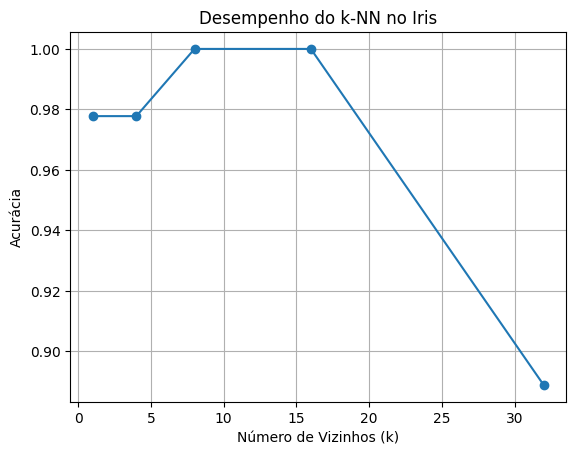

In [24]:
plt.plot(df_metrics_k_iris["k"], df_metrics_k_iris["Acurácia"], marker="o")
plt.title("Desempenho do k-NN no Iris")
plt.xlabel("Número de Vizinhos (k)")
plt.ylabel("Acurácia")
plt.grid(True)
plt.show()

A partir do gráfic o é possivel analisar que:

Para valores baixos de k (entre 0 e 5), a acuracia é alta, porém ligeramente inferior ao desempenho maximo. Indicando que o modelo é eficaz, mas pode estar muito sensível ao ruído dos dados de treino.

Para valores intermediarios (entre 8 e 16) o modelo atinge o desempenho máximo (100% de acurácia). Sugerindo que esses valores de k são os ideais para esse conjunto de dados, proporcionando um equilíbrio entre viés e variância, ou seja, o modelo generaliza bem sem ser excessivamente complexo.

Para valores altos (entre 20 e 30), o desempenho cai significamente. Pois o modelo passa a considerar vizinhos demais, incluindo amostras de diferentes classes, o que torna as decisões menos precisas.

##Dataset Wine

O Wine Dataset contém 178 amostras de vinhos, distribuídas em 3 classes, com base em 13 características químicas, como acidez, concentração de fenóis, alcalinidade, entre outras.

- Número de amostras: 178

- Número de classes: 3 variedades de vinho

- Número de características: 13, incluindo propriedades químicas como acidez fixa, acidez volátil, cloretos, fenóis, etc.

Essas 13 características são medidas em unidades químicas (como mg/l) e são representações dos compostos encontrados nos vinhos, que ajudam a distinguir as variedades.



###Configuração Dataset Wine

In [25]:
wine = load_wine()

In [26]:
X_wine = wine.data  # Características químicas do vinho
y_wine = wine.target  # Classes: 0, 1, 2 representando as 3 variedades de vinho

###Visualizar classes do dataset Wine





In [27]:
print(wine.target_names)

['class_0' 'class_1' 'class_2']


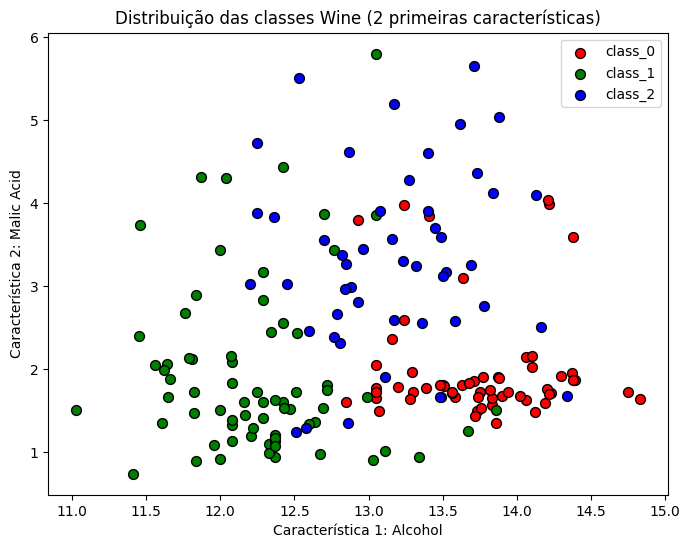

In [28]:
# Selecionar as duas primeiras características para plotagem
X_wine_plot = X_wine[:, :2]

plt.figure(figsize=(8,6))
colors = ['red', 'green', 'blue']

for i, color, target_name in zip(range(len(wine.target_names)), colors, wine.target_names):
    plt.scatter(X_wine_plot[y_wine == i, 0], X_wine_plot[y_wine == i, 1],
                color=color, label=target_name, edgecolor='k', s=50)

plt.xlabel('Característica 1: Alcohol')
plt.ylabel('Característica 2: Malic Acid')
plt.title('Distribuição das classes Wine (2 primeiras características)')
plt.legend()
plt.show()

###Divisão dos dados

In [29]:
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.3, random_state=42)

In [30]:
# Normalizar os dados (importante para K-NN)
scaler_wine = StandardScaler()
X_train_scaled_wine = scaler_wine.fit_transform(X_train_wine)
X_test_scaled_wine = scaler_wine.transform(X_test_wine)

###Calculo Acuracia

In [31]:
# Criar e treinar um novo modelo K-NN para o Wine dataset
k = 3
knn_wine = KNeighborsClassifier(n_neighbors=k)
knn_wine.fit(X_train_scaled_wine, y_train_wine)

# Fazer previsões no conjunto de teste do Wine
y_wine_pred = knn_wine.predict(X_test_scaled_wine)

In [32]:
# Avaliar a precisão do modelo
acuracia_wine = accuracy_score(y_test_wine, y_wine_pred)
print(f"Acurácia (Wine, k=3): {acuracia_wine*100:.2f}%")

Acurácia (Wine, k=3): 96.30%


### Calcular Precisão, Recall e F1-score

In [33]:
precision_wine = precision_score(y_test_wine, y_wine_pred, average=None)
recall_wine = recall_score(y_test_wine, y_wine_pred, average=None)
f1_wine = f1_score(y_test_wine, y_wine_pred, average=None)

In [34]:
# Exibir as métricas de cada classe
df_metrics_wine = pd.DataFrame({
    "Classe": wine.target_names,
    "Precisão": precision_wine,
    "Recall": recall_wine,
    "F1-score": f1_wine
})
print("\nMétricas do Dataset Wine (k=3):")
print(df_metrics_wine)


Métricas do Dataset Wine (k=3):
    Classe  Precisão    Recall  F1-score
0  class_0  0.950000  1.000000  0.974359
1  class_1  1.000000  0.904762  0.950000
2  class_2  0.933333  1.000000  0.965517


O modelo tem um desempenho muito bom em todas as classes.


A precisão é alta, o que significa que a maioria das previsões feitas pelo modelo estão corretas.


O recall é perfeito para class_0 e class_2, mas para class_1, há uma pequena perda no recall (10% das instâncias de class_1 não são identificadas corretamente).


O F1-score é bastante equilibrado em todas as classes, indicando que o modelo mantém um bom desempenho tanto em termos de precisão quanto de recall.


O modelo K-NN tem um desempenho muito bom em todas as classes, com um pequeno ponto de atenção na classe 1, onde o recall é um pouco mais baixo. Isso sugere que, embora o modelo seja bom em identificar as classes em geral, pode haver oportunidades para melhorar a capacidade de identificar corretamente todas as instâncias de class_1.

### Testar diferentes valores de k

In [35]:
metrics_results_wine = []

In [36]:
# Testar diferentes valores de K
for k in [1, 3, 5, 7, 9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled_wine, y_train_wine)
    y_pred_wine_k = knn.predict(X_test_scaled_wine)
    acc = accuracy_score(y_test_wine, y_pred_wine_k)

    # Métricas detalhadas
    precision = precision_score(y_test_wine, y_pred_wine_k, average=None)
    recall = recall_score(y_test_wine, y_pred_wine_k, average=None)
    f1 = f1_score(y_test_wine, y_pred_wine_k, average=None)

    metrics_results_wine.append({
        "k": k,
        "Acurácia": acc,
        "Precisão (classe 0)": precision[0],
        "Recall (classe 0)": recall[0],
        "F1 (classe 0)": f1[0],
        "Precisão (classe 1)": precision[1],
        "Recall (classe 1)": recall[1],
        "F1 (classe 1)": f1[1],
        "Precisão (classe 2)": precision[2],
        "Recall (classe 2)": recall[2],
        "F1 (classe 2)": f1[2]
    })

In [37]:
df_metrics_k_wine = pd.DataFrame(metrics_results_wine)
print(df_metrics_k_wine)

   k  Acurácia  Precisão (classe 0)  Recall (classe 0)  F1 (classe 0)  \
0  1  0.962963                 0.95                1.0       0.974359   
1  3  0.962963                 0.95                1.0       0.974359   
2  5  0.962963                 0.95                1.0       0.974359   
3  7  0.981481                 0.95                1.0       0.974359   
4  9  0.981481                 0.95                1.0       0.974359   

   Precisão (classe 1)  Recall (classe 1)  F1 (classe 1)  Precisão (classe 2)  \
0                  1.0           0.904762        0.95000             0.933333   
1                  1.0           0.904762        0.95000             0.933333   
2                  1.0           0.904762        0.95000             0.933333   
3                  1.0           0.952381        0.97561             1.000000   
4                  1.0           0.952381        0.97561             1.000000   

   Recall (classe 2)  F1 (classe 2)  
0                1.0       0.965517 

Para valores pequenos de k (1, 3 e 5), a acurácia se mantém constante em 96,30%, o que indica que o modelo já tem um bom desempenho mesmo com poucos vizinhos.

Para valores de k = 7 e 9, a acuracia aumenta ligeiramente para para 98,15%. Isso sugere que valores moderadamente maiores de k ajudam o modelo a generalizar melhor, reduzindo levemente o impacto de possíveis ruídos.

###Desempenho do k-NN no Wine

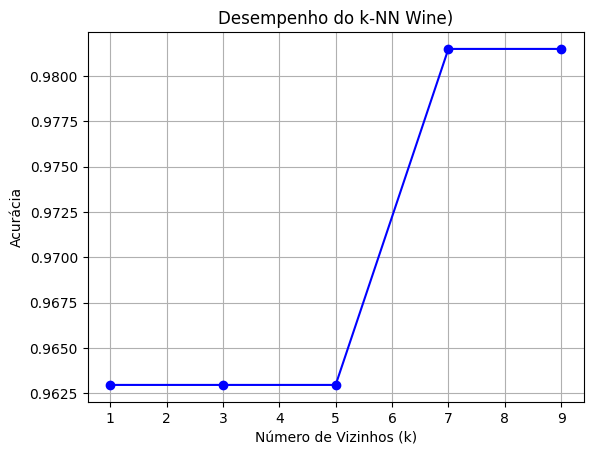

In [42]:
plt.plot(df_metrics_k_wine["k"], df_metrics_k_wine["Acurácia"], marker="o", color="b")
plt.title("Desempenho do k-NN Wine)")
plt.xlabel("Número de Vizinhos (k)")
plt.ylabel("Acurácia")
plt.grid(True)
plt.show()

Para valores baixos de k (de 1 a 5), o desempenho do modelo é relativamente constante, com uma acurácia em torno de 96%. Considerando poucos vizinhos pode tornar o modelo sensível a ruídos, causando decisões baseadas em amostras muito específicas.

Para valores intermediários (de 7 a 9), a acurácia melhora e se mantém em um valor maior, cerca de 98%. Isso indica que o modelo está conseguindo um bom equilíbrio entre considerar vizinhos suficientes para suavizar ruídos, mas sem incluir vizinhos demais de outras classes.

Portanto, para o dataset Wine, escolher um k intermediário, como 7 ou 9, é ideal para maximizar a acurácia do k-NN, evitando tanto a sensibilidade excessiva do modelo com valores baixos quanto a generalização excessiva com valores altos de k.